In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/w-eather/weatherHistory.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
file_path = '/kaggle/input/w-eather/weatherHistory.csv'

dataframe = pd.read_csv(file_path)

CHECKING FOR NULL , IF NULL EXIST DELETING OR TAKING ACTION 

In [3]:
dataframe.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [4]:
dataframe.dropna(inplace=True)

In [5]:
dataframe.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

INFO BOUT THE DATASET

In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95936 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            95936 non-null  object 
 1   Summary                   95936 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           95936 non-null  float64
 4   Apparent Temperature (C)  95936 non-null  float64
 5   Humidity                  95936 non-null  float64
 6   Wind Speed (km/h)         95936 non-null  float64
 7   Wind Bearing (degrees)    95936 non-null  float64
 8   Visibility (km)           95936 non-null  float64
 9   Loud Cover                95936 non-null  float64
 10  Pressure (millibars)      95936 non-null  float64
 11  Daily Summary             95936 non-null  object 
dtypes: float64(8), object(4)
memory usage: 9.5+ MB


In [7]:
dataframe=dataframe.drop(['Formatted Date','Wind Bearing (degrees)','Apparent Temperature (C)'],axis=1)

In [8]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95936 entries, 0 to 96452
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Summary               95936 non-null  object 
 1   Precip Type           95936 non-null  object 
 2   Temperature (C)       95936 non-null  float64
 3   Humidity              95936 non-null  float64
 4   Wind Speed (km/h)     95936 non-null  float64
 5   Visibility (km)       95936 non-null  float64
 6   Loud Cover            95936 non-null  float64
 7   Pressure (millibars)  95936 non-null  float64
 8   Daily Summary         95936 non-null  object 
dtypes: float64(6), object(3)
memory usage: 7.3+ MB


IMPORTING PLOTING VISUALS LIBRARY

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

IMPORTING SCITLEARN LIBRARY 

In [10]:
#n -m venv sklearn-env
#sklearn-env\Scripts\activate  # activate
!pip install -U scikit-learn

^C


In [11]:
dataframe.head()

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,Partly Cloudy,rain,9.472222,0.89,14.1197,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,Partly Cloudy,rain,9.355556,0.86,14.2646,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,Mostly Cloudy,rain,9.377778,0.89,3.9284,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,Partly Cloudy,rain,8.288889,0.83,14.1036,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,Mostly Cloudy,rain,8.755556,0.83,11.0446,15.8263,0.0,1016.51,Partly cloudy throughout the day.


CHECKING HOW MANY UNIQUE ENTRIES ARE THERE IN THE DATASET

In [12]:
dataframe['Summary'].unique()

array(['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Foggy',
       'Breezy and Mostly Cloudy', 'Clear', 'Breezy and Partly Cloudy',
       'Breezy and Overcast', 'Humid and Mostly Cloudy',
       'Humid and Partly Cloudy', 'Windy and Foggy', 'Windy and Overcast',
       'Breezy and Foggy', 'Windy and Partly Cloudy', 'Breezy',
       'Dry and Partly Cloudy', 'Windy and Mostly Cloudy',
       'Dangerously Windy and Partly Cloudy', 'Dry', 'Windy',
       'Humid and Overcast', 'Light Rain', 'Drizzle', 'Windy and Dry',
       'Dry and Mostly Cloudy', 'Breezy and Dry', 'Rain'], dtype=object)

In [13]:
dataframe['Precip Type'].unique()

array(['rain', 'snow'], dtype=object)

In [14]:
dataframe['Daily Summary'].unique()

array(['Partly cloudy throughout the day.',
       'Mostly cloudy throughout the day.', 'Foggy in the evening.',
       'Foggy overnight and breezy in the morning.',
       'Overcast throughout the day.', 'Partly cloudy until night.',
       'Mostly cloudy until night.',
       'Foggy starting overnight continuing until morning.',
       'Foggy in the morning.', 'Partly cloudy until evening.',
       'Partly cloudy starting in the morning.',
       'Mostly cloudy starting overnight continuing until night.',
       'Mostly cloudy until evening.',
       'Partly cloudy starting in the morning continuing until evening.',
       'Partly cloudy starting in the afternoon.',
       'Partly cloudy starting overnight.',
       'Partly cloudy until morning.',
       'Partly cloudy starting overnight continuing until night.',
       'Partly cloudy starting in the afternoon continuing until night.',
       'Mostly cloudy starting overnight.',
       'Partly cloudy until afternoon.',
       'Mostly

PERFORMING ENCODING 

In [15]:
from sklearn import preprocessing

In [16]:
label_encoder=preprocessing.LabelEncoder()

In [17]:
dataframe['Precip']=label_encoder.fit_transform(dataframe['Precip Type'])

In [18]:
dataframe['Precip'].unique()

array([0, 1])

In [19]:
dataframe['dailysummary']=label_encoder.fit_transform(dataframe['Daily Summary'])

In [20]:
dataframe['dailysummary'].unique()

array([197, 111,  33,  36, 143, 209, 132,  57,  35, 204, 170,  94, 118,
       166, 156, 188, 205, 187, 155,  95, 198, 120,  43,  60,  42, 119,
        47,  51, 162,  59,  63,  52,  41, 175, 169, 147,  91,  37, 150,
        83,  39, 112,  58,  97,  45, 148,  29, 154, 152, 144,  34,  18,
       183,  96,  84, 195,  98, 157, 128, 165, 193, 194,  61, 146,  28,
        82,  23, 149,  89,  79,  72,  80, 174, 171,  75,  40,  64,  48,
        62,  49, 181, 179,  20, 105, 202,  71,  19, 109,   3,  88, 208,
         2,  99, 104, 191, 164, 192,  85, 153, 159, 200, 178, 176, 103,
       110,  22,  76, 142, 190, 115, 121, 158, 134,  90, 182, 203,  16,
       160,  92, 107,  21, 108, 137, 136,  81, 126, 207, 201, 186,  15,
        55, 125,  32, 124,  54,  25, 106, 177,  74,  93,  56, 117,  50,
        44, 173,  53,  86, 141, 163, 167, 127,   6, 129, 180,   7, 151,
        66,  69,  65, 168,  14, 102,  38,   1, 130, 185, 184,  77, 172,
         9, 206,  87,  11,  73, 101, 100, 131,   0,  10, 139,  2

In [21]:
dataframe['summary_sum']=label_encoder.fit_transform(dataframe['Summary'])

In [22]:
dataframe['summary_sum'].unique()

array([19, 17, 18, 12,  3,  6,  5,  4, 13, 15, 23, 25,  2, 26,  0, 11, 24,
        7,  9, 21, 14, 16,  8, 22, 10,  1, 20])

In [23]:
dataframe=dataframe.drop(['Summary','Precip Type','Daily Summary'],axis=1)

In [24]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95936 entries, 0 to 96452
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature (C)       95936 non-null  float64
 1   Humidity              95936 non-null  float64
 2   Wind Speed (km/h)     95936 non-null  float64
 3   Visibility (km)       95936 non-null  float64
 4   Loud Cover            95936 non-null  float64
 5   Pressure (millibars)  95936 non-null  float64
 6   Precip                95936 non-null  int64  
 7   dailysummary          95936 non-null  int64  
 8   summary_sum           95936 non-null  int64  
dtypes: float64(6), int64(3)
memory usage: 7.3 MB


In [25]:
X  = dataframe.drop('Precip',axis=1)

In [26]:
y = dataframe['Precip'].astype(int)

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

RANDOM FOREST ALGO

In [30]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()

In [31]:
classifier.fit(X=X_train,y=y_train)

RandomForestClassifier()

In [32]:
test_pred = classifier.predict(X_test)

In [33]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95936 entries, 0 to 96452
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature (C)       95936 non-null  float64
 1   Humidity              95936 non-null  float64
 2   Wind Speed (km/h)     95936 non-null  float64
 3   Visibility (km)       95936 non-null  float64
 4   Loud Cover            95936 non-null  float64
 5   Pressure (millibars)  95936 non-null  float64
 6   dailysummary          95936 non-null  int64  
 7   summary_sum           95936 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 6.6 MB


In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [35]:
accuracy = accuracy_score(y_test,test_pred)

In [39]:
print('Accuracy score is ' + str((accuracy * 100 )) )

Accuracy score is 100.0


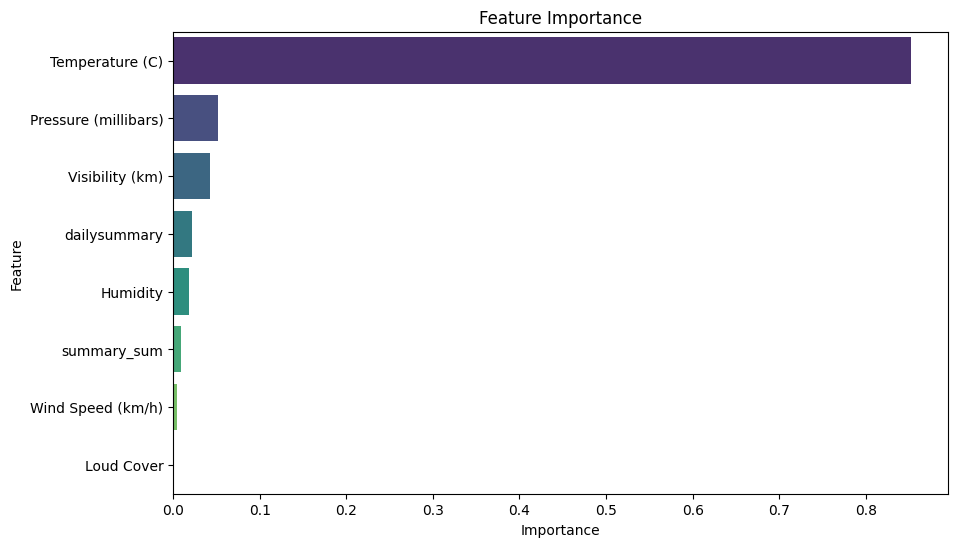

In [37]:
feature_importances = classifier.feature_importances_
features = X_train.columns  # Replace with feature names
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [40]:
cm = confusion_matrix(y_test, y_pred)  # Replace y_pred with predicted classes

# Use np.unique to get class labels if rf_model.classes_ is not available
class_labels = np.unique(y_train)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap='Blues')

plt.title('Confusion Matrix')
plt.show()

NameError: name 'y_pred' is not defined

SAMPLE EXERCISE **for daily summary as data set is large for defining**

In [41]:
from sklearn.pipeline import Pipeline

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators=100))
])


In [45]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', RandomForestClassifier())])

In [48]:
accuracy = pipeline.score(X_test, y_test)

In [49]:
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


LINEAR REGRESSION ALGO

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
from sklearn.metrics import mean_squared_error

In [53]:
model = LinearRegression()

In [54]:
model.fit(X_train, y_train)

LinearRegression()

In [55]:
predictions = model.predict(X_test)

In [56]:
print("Mean Squared Error:", mean_squared_error(y_test, predictions))

Mean Squared Error: 0.0612740932171047


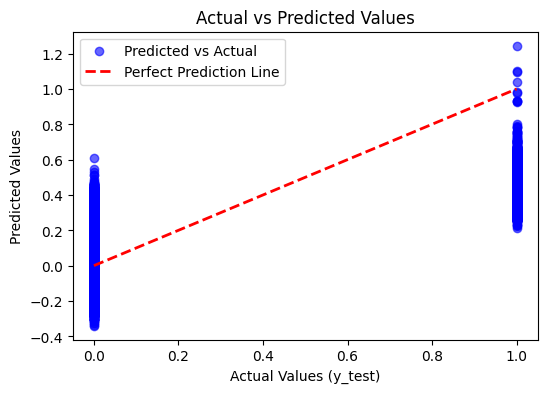

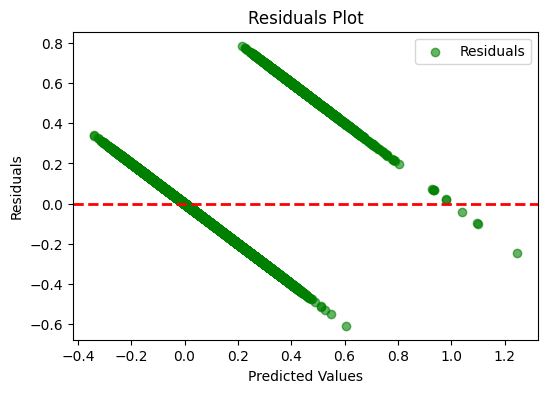

In [57]:
# Scatter plot: Actual vs. Predicted values
plt.figure(figsize=(6, 4))
plt.scatter(y_test, predictions, color='blue', alpha=0.6, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction Line')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

# Residual Plot: Errors (y_test - predictions)
residuals = y_test - predictions
plt.figure(figsize=(6, 4))
plt.scatter(predictions, residuals, color='green', alpha=0.6, label='Residuals')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()
plt.show()

DECISION TREE CLASSIFIER ALGO

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
from sklearn.tree import plot_tree

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
tree_model = DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
tree_model.fit(X, y)

In [ ]:
plt.figure(figsize=(10, 8))

In [ ]:
plot_tree(
    tree_model,
    feature_names=dataframe.Humidity.astype(str).tolist(),  # Convert to strings
    class_names=dataframe.Humidity.astype(str).tolist(),   # Convert to strings
    filled=True
)

In [ ]:
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Fit the RandomForest model
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

# Plot one of the decision trees in the Random Forest
plt.figure(figsize=(20, 10))
plot_tree(classifier.estimators_[0], feature_names=X_train.columns, filled=True, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()

Support Vector Machines (SVM) algo

In [ ]:
from sklearn.svm import SVC

In [ ]:
from sklearn.datasets import make_classification

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
svm_model = SVC(kernel='linear', random_state=42)

In [ ]:
svm_model.fit(X_train, y_train)

In [ ]:
y_pred = svm_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming your data is in a DataFrame called 'dataframe'
# Columns: Temperature (C), Humidity, etc. You must use the actual features and target variable

# Select features and target
X = dataframe[['Temperature (C)', 'Humidity']].values  # Use two features for visualization
y = dataframe['Precip'].values  # Target variable (e.g., Precip)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions and print classification report
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

# Create a mesh grid for visualization
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict on the mesh grid
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', s=20, cmap=plt.cm.coolwarm)
plt.title("SVM Decision Boundary")
plt.xlabel("Temperature (C)")
plt.ylabel("Humidity")
plt.show()

TESTING THE MODEL

In [58]:
test_pred = classifier.predict(np.array([[-1.244444,-1.244444,0.99,2.4955,291.0,1012,1,7]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [59]:
test_pred

array([1])

In [ ]:
print(X_train.shape)
print(y_train.shape)

In [ ]:
print(X_test.shape)
print(y_test.shape)

In [ ]:
y_test.shape

In [ ]:
test_pred = classifier.predict(X_test)

In [ ]:
print("Mean Squared Error:", mean_squared_error(y_test, test_pred))

CONFUSSION MATRIX 

In [ ]:
cm = confusion_matrix(y_test, y_pred)

In [ ]:
print("Confusion Matrix:\n", cm)

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


ENSEMBLE METHODS

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Define the ensemble using hard voting
# (We assume rf_model and svc_model are your pre-trained Random Forest and SVC models)
ensemble_model = VotingClassifier(
    estimators=[('RandomForest', classifier), ('SVC', svm_model)],
    voting='hard'  # Use 'hard' for majority voting
)

# Step 2: Fit the ensemble model
# Even though the individual models are pre-trained, the VotingClassifier must still be fitted
ensemble_model.fit(X_train, y_train)

# Step 3: Make predictions on the test data
y_pred = ensemble_model.predict(X_test)

# Step 4: Evaluate the ensemble model
print("Ensemble Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# (Optional) Print a few predictions
print("Sample Test Predictions:", y_pred[:10])